**Reproduction of:**

**Deep Convolutional Neural Networks and Data Augmentation for Environmental  Sound Classification** 

Justin Salamon and Juan Pablo Bello

Some code taken from https://github.com/jaron/deep-listening/blob/master/4-us8k-cnn-salamon.ipynb

# Preprocessing

In [1]:
#import os

#for dir in [load_dir, augmented_load_dir]:
#    for k in range(1,10+1):
#        filename = "fold"+str(k)+"_x.npy"
#        file_path = os.path.join(dir,filename)
#        file= np.load(file_path, allow_pickle = True)
#        file = file.astype('float32') 
#        np.save(file_path, file, allow_pickle = True)

In [2]:
#!git clone https://github.com/grudloff/Salomon2017Replication

In [13]:
import numpy as np
import math

from preprocessing_augmented import load_folds
from model import build_model
from evaluation import evaluate

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import Sequence

from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


load_dir = "CNN-Sound/data/us8k"
augmented_load_dir = "CNN-Sound/data/us8k-augmented"

10-Fold Crossvalidation.

In [4]:
acc = np.zeros(10)
roc = np.zeros(10)

CM = 0

for f in range(1,10+1):

    # load data
    train_x, test_x, val_x, train_y, test_y, val_y = load_folds(load_dir,augmented_load_dir, f)
    #train_gen, test_x, val_x, test_y, val_y = load_folds_pescador(load_dir,augmented_load_dir, f)

    
    print("Building model...")
    model = build_model(channels = 1)

    # now fit the model to the training data, evaluating loss against the validation data
    print("Training model...")
    model.fit(train_x, train_y, validation_data=(test_x, test_y), 
              callbacks=[EarlyStopping(restore_best_weights=True, patience=15)],
              batch_size=100, epochs=100)
    
    # now evaluate the trained model against the unseen test data
    print("Evaluating model...")
    roc[f-1], acc[f-1], cm = evaluate(model, val_x, val_y)
    CM += cm

    
print ('\nAverage R.O.C:', np.mean(roc))
print ('Average Accuracy:', np.mean(acc))

# using all folds: best ROC = 0.91, f-score = 0.592 (50 epochs)
# using 2 folds: average ROC = 0.792, average f-score = 0.335

# if you want to save the model, uncomment this...
#filepath = "models/salamon-cnn-model.h5"
#model.save(filepath)


*** Train on {3, 4, 5, 6, 7, 8, 9} Validate on 1 Test on 2 ***
val shape:  (873, 128, 128, 1)
test shape:  (888, 128, 128, 1)
train shape:  (146391, 128, 128, 1)
Building model...
Training model...
Train on 146391 samples, validate on 888 samples
Epoch 1/100
146391/146391 [==============================] - 89s 607us/sample - loss: 2.5204 - accuracy: 0.2183 - val_loss: 2.0363 - val_accuracy: 0.3187
Epoch 2/100
146391/146391 [==============================] - 85s 578us/sample - loss: 1.9122 - accuracy: 0.3899 - val_loss: 1.6084 - val_accuracy: 0.4606
Epoch 3/100
146391/146391 [==============================] - 85s 579us/sample - loss: 1.6812 - accuracy: 0.4762 - val_loss: 1.4879 - val_accuracy: 0.5113
Epoch 4/100
146391/146391 [==============================] - 85s 579us/sample - loss: 1.5428 - accuracy: 0.5238 - val_loss: 1.4137 - val_accuracy: 0.5495
Epoch 5/100
146391/146391 [==============================] - 86s 587us/sample - loss: 1.4491 - accuracy: 0.5564 - val_loss: 1.3849 - val

147441/147441 [==============================] - 85s 574us/sample - loss: 1.2308 - accuracy: 0.6132 - val_loss: 1.5986 - val_accuracy: 0.4386
Epoch 5/100
147441/147441 [==============================] - 85s 574us/sample - loss: 1.1292 - accuracy: 0.6489 - val_loss: 1.3295 - val_accuracy: 0.5541
Epoch 6/100
147441/147441 [==============================] - 85s 574us/sample - loss: 1.0421 - accuracy: 0.6793 - val_loss: 1.3597 - val_accuracy: 0.5589
Epoch 7/100
147441/147441 [==============================] - 85s 575us/sample - loss: 0.9795 - accuracy: 0.6990 - val_loss: 1.2444 - val_accuracy: 0.5966
Epoch 8/100
147441/147441 [==============================] - 85s 574us/sample - loss: 0.9258 - accuracy: 0.7148 - val_loss: 1.3472 - val_accuracy: 0.5978
Epoch 9/100
147441/147441 [==============================] - 85s 574us/sample - loss: 0.8860 - accuracy: 0.7273 - val_loss: 1.4694 - val_accuracy: 0.5723
Epoch 10/100
147441/147441 [==============================] - 85s 575us/sample - loss: 0

144291/144291 [==============================] - 81s 560us/sample - loss: 0.5670 - accuracy: 0.8254 - val_loss: 0.9243 - val_accuracy: 0.7639
Epoch 23/100
144291/144291 [==============================] - 81s 560us/sample - loss: 0.5564 - accuracy: 0.8268 - val_loss: 0.8934 - val_accuracy: 0.7532
Epoch 24/100
144291/144291 [==============================] - 81s 560us/sample - loss: 0.5483 - accuracy: 0.8298 - val_loss: 1.0047 - val_accuracy: 0.7575
Epoch 25/100
144291/144291 [==============================] - 81s 561us/sample - loss: 0.5397 - accuracy: 0.8325 - val_loss: 0.9011 - val_accuracy: 0.7425
Epoch 26/100
144291/144291 [==============================] - 81s 560us/sample - loss: 0.5277 - accuracy: 0.8357 - val_loss: 0.9754 - val_accuracy: 0.7468
Epoch 27/100
144291/144291 [==============================] - 81s 561us/sample - loss: 0.5220 - accuracy: 0.8372 - val_loss: 0.9105 - val_accuracy: 0.7532
Epoch 28/100
144291/144291 [==============================] - 81s 560us/sample - lo

Epoch 39/100
143934/143934 [==============================] - 84s 583us/sample - loss: 0.5435 - accuracy: 0.8265 - val_loss: 1.7315 - val_accuracy: 0.6171
Epoch 40/100
143934/143934 [==============================] - 84s 580us/sample - loss: 0.5333 - accuracy: 0.8292 - val_loss: 1.4263 - val_accuracy: 0.6509
Epoch 41/100
143934/143934 [==============================] - 84s 581us/sample - loss: 0.5297 - accuracy: 0.8298 - val_loss: 1.6215 - val_accuracy: 0.6408
Epoch 42/100
143934/143934 [==============================] - 84s 581us/sample - loss: 0.5264 - accuracy: 0.8327 - val_loss: 1.4954 - val_accuracy: 0.6554
Epoch 43/100
143934/143934 [==============================] - 84s 582us/sample - loss: 0.5164 - accuracy: 0.8355 - val_loss: 1.5169 - val_accuracy: 0.6306
Epoch 44/100
143934/143934 [==============================] - 84s 580us/sample - loss: 0.5146 - accuracy: 0.8358 - val_loss: 1.6674 - val_accuracy: 0.6329
Epoch 45/100
143934/143934 [==============================] - 84s 581u

147441/147441 [==============================] - 86s 582us/sample - loss: 1.0928 - accuracy: 0.6562 - val_loss: 1.1640 - val_accuracy: 0.6273
Epoch 8/100
147441/147441 [==============================] - 86s 584us/sample - loss: 1.0382 - accuracy: 0.6743 - val_loss: 1.3111 - val_accuracy: 0.5957
Epoch 9/100
147441/147441 [==============================] - 86s 586us/sample - loss: 0.9917 - accuracy: 0.6903 - val_loss: 1.5384 - val_accuracy: 0.5608
Epoch 10/100
147441/147441 [==============================] - 86s 581us/sample - loss: 0.9490 - accuracy: 0.7017 - val_loss: 1.1756 - val_accuracy: 0.6126
Epoch 11/100
147441/147441 [==============================] - 86s 581us/sample - loss: 0.9124 - accuracy: 0.7131 - val_loss: 1.3590 - val_accuracy: 0.5822
Epoch 12/100
147441/147441 [==============================] - 86s 581us/sample - loss: 0.8826 - accuracy: 0.7232 - val_loss: 1.1411 - val_accuracy: 0.6374
Epoch 13/100
147441/147441 [==============================] - 86s 582us/sample - loss

147441/147441 [==============================] - 85s 577us/sample - loss: 0.4138 - accuracy: 0.8708 - val_loss: 1.2678 - val_accuracy: 0.6745
Epoch 60/100
147441/147441 [==============================] - 85s 577us/sample - loss: 0.4017 - accuracy: 0.8742 - val_loss: 1.1637 - val_accuracy: 0.6937
Evaluating model...
ROC: 0.955

Accuracy = 0.74
F-Score: 0.74

*** Train on {1, 2, 4, 5, 6, 8, 9} Validate on 7 Test on 3 ***
val shape:  (838, 128, 128, 1)
test shape:  (925, 128, 128, 1)
train shape:  (146349, 128, 128, 1)
Building model...
Training model...
Train on 146349 samples, validate on 925 samples
Epoch 1/100
146349/146349 [==============================] - 87s 593us/sample - loss: 2.5131 - accuracy: 0.1408 - val_loss: 2.1388 - val_accuracy: 0.3005
Epoch 2/100
146349/146349 [==============================] - 84s 573us/sample - loss: 1.9021 - accuracy: 0.3683 - val_loss: 1.7868 - val_accuracy: 0.3773
Epoch 3/100
146349/146349 [==============================] - 84s 575us/sample - loss:

148848/148848 [==============================] - 87s 586us/sample - loss: 2.1218 - accuracy: 0.2796 - val_loss: 1.5991 - val_accuracy: 0.4976
Epoch 2/100
148848/148848 [==============================] - 87s 584us/sample - loss: 1.4353 - accuracy: 0.5410 - val_loss: 1.2616 - val_accuracy: 0.6265
Epoch 3/100
148848/148848 [==============================] - 87s 583us/sample - loss: 1.1803 - accuracy: 0.6367 - val_loss: 1.1315 - val_accuracy: 0.6659
Epoch 4/100
148848/148848 [==============================] - 87s 586us/sample - loss: 1.0423 - accuracy: 0.6835 - val_loss: 1.1274 - val_accuracy: 0.6492
Epoch 5/100
148848/148848 [==============================] - 87s 586us/sample - loss: 0.9774 - accuracy: 0.7034 - val_loss: 1.0139 - val_accuracy: 0.6933
Epoch 6/100
148848/148848 [==============================] - 87s 584us/sample - loss: 0.8838 - accuracy: 0.7352 - val_loss: 0.9898 - val_accuracy: 0.6957
Epoch 7/100
148848/148848 [==============================] - 87s 585us/sample - loss: 0.

146811/146811 [==============================] - 84s 574us/sample - loss: 0.7045 - accuracy: 0.7752 - val_loss: 1.9428 - val_accuracy: 0.4789045 - accuracy: 0.77
Epoch 30/100
146811/146811 [==============================] - 84s 570us/sample - loss: 0.6815 - accuracy: 0.7818 - val_loss: 1.5044 - val_accuracy: 0.5557
Epoch 31/100
146811/146811 [==============================] - 84s 571us/sample - loss: 0.6693 - accuracy: 0.7868 - val_loss: 1.8426 - val_accuracy: 0.5178
Epoch 32/100
146811/146811 [==============================] - 84s 571us/sample - loss: 0.6644 - accuracy: 0.7883 - val_loss: 1.4606 - val_accuracy: 0.5741
Epoch 33/100
146811/146811 [==============================] - 84s 569us/sample - loss: 0.6559 - accuracy: 0.7917 - val_loss: 1.5521 - val_accuracy: 0.5730
Evaluating model...
ROC: 0.932

Accuracy = 0.65
F-Score: 0.65

*** Train on {1, 2, 3, 4, 5, 7, 8, 9} Validate on 10 Test on 6 ***
val shape:  (837, 128, 128, 1)
test shape:  (823, 128, 128, 1)
train shape:  (148512, 12

In [9]:
!conda install matplotlib seaborn pandas

^C


In [10]:
!pip install matplotlib seaborn

{'whiskers': [<matplotlib.lines.Line2D at 0x1b18c804c48>,
 'caps': [<matplotlib.lines.Line2D at 0x1b18c80a1c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b18c804a88>],
 'medians': [<matplotlib.lines.Line2D at 0x1b18c80e548>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b18dcd1888>],
 'means': []}

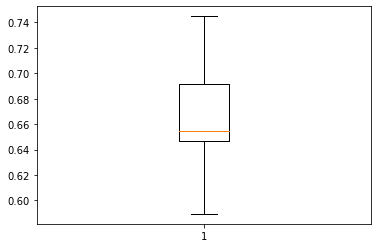

In [11]:
plt.boxplot(acc)

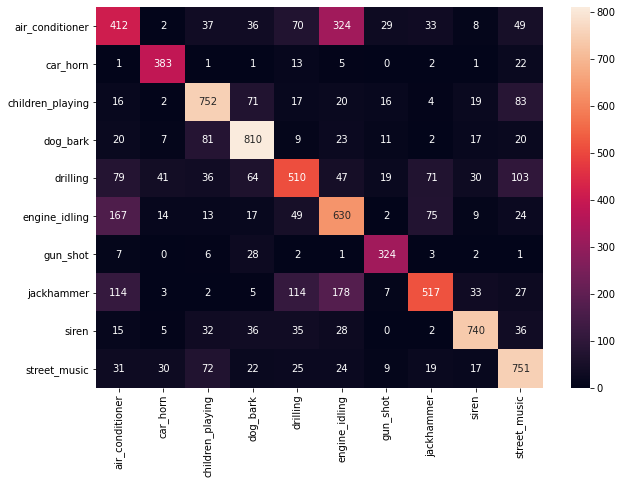

In [14]:
classes = ['air_conditioner',
'car_horn',
'children_playing',
'dog_bark',
'drilling',
'engine_idling',
'gun_shot',
'jackhammer',
'siren',
'street_music']
df_cm = pd.DataFrame(CM, index = classes,
                  columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,  fmt='d')

In [7]:
np.save("acc_augmented.npy", acc)
np.save("cm_agumented.npy", CM)